# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['woodstock', 'faanui', 'vaini', 'puerto ayora', 'tsihombe', 'tuatapere', 'haibowan', 'hithadhoo', 'saskylakh', 'mataura', 'samarai', 'rikitea', 'la rioja', 'iqaluit', 'mayya', 'punta arenas', 'castro', 'albany', 'aklavik', 'chokurdakh', 'ushuaia', 'georgetown', 'carnarvon', 'acapulco', 'bredasdorp', 'torbay', 'kaputa', 'podporozhye', 'nelson bay', 'karratha', 'kloulklubed', 'dingle', 'nipawin', 'port alfred', 'volnovakha', 'estacion coahuila', 'ribeira grande', 'tuktoyaktuk', 'cayenne', 'walvis bay', 'nabire', 'rio gallegos', 'magangue', 'jamestown', 'barinas', 'bathsheba', 'sao joao da barra', 'kahului', 'saint-philippe', 'armidale', 'pevek', 'butaritari', 'penzance', 'mys shmidta', 'taoudenni', 'kapaa', 'tongliao', 'tasiilaq', 'new norfolk', 'yellowknife', 'margate', 'hasaki', 'east london', 'dikson', 'bluff', 'pacific grove', 'cape town', 'kruisfontein', 'flinders', 'busselton', 'khatanga', 'asyut', 'ugoofaaru', 'vila velha', 'talnakh', 'pangnirtung', 'vila do maio', 'hobart', 'vil

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

found_cities = []
lat = []
tempf = []
humidity = []
cloudiness = []
windspeed = []

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
for index, city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        tempf.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        found_cities.append(city)
        print(f"{index}:{city}")
    except KeyError:
        print(f'{index}:{city} cannot be found')



0:woodstock
1:faanui
2:vaini
3:puerto ayora
4:tsihombe cannot be found
5:tuatapere
6:haibowan cannot be found
7:hithadhoo
8:saskylakh
9:mataura
10:samarai
11:rikitea
12:la rioja
13:iqaluit
14:mayya
15:punta arenas
16:castro
17:albany
18:aklavik
19:chokurdakh
20:ushuaia
21:georgetown
22:carnarvon
23:acapulco
24:bredasdorp
25:torbay
26:kaputa
27:podporozhye
28:nelson bay
29:karratha
30:kloulklubed
31:dingle
32:nipawin
33:port alfred
34:volnovakha
35:estacion coahuila
36:ribeira grande
37:tuktoyaktuk
38:cayenne
39:walvis bay
40:nabire
41:rio gallegos
42:magangue
43:jamestown
44:barinas
45:bathsheba
46:sao joao da barra
47:kahului
48:saint-philippe
49:armidale
50:pevek
51:butaritari
52:penzance
53:mys shmidta cannot be found
54:taoudenni
55:kapaa
56:tongliao
57:tasiilaq
58:new norfolk
59:yellowknife
60:margate
61:hasaki
62:east london
63:dikson
64:bluff
65:pacific grove
66:cape town
67:kruisfontein
68:flinders
69:busselton
70:khatanga
71:asyut
72:ugoofaaru
73:vila velha
74:talnakh
75:pangn

554:puerto del rosario
555:teluk nibung
556:ende
557:kalinovskoye
558:zeya
559:louisbourg cannot be found
560:sovetskaya gavan
561:moron
562:rivera
563:craig
564:pyaozerskiy
565:elk city
566:namibe
567:atherton
568:luis correia
569:banda aceh
570:meadow lake
571:somotillo
572:alice springs
573:peniche
574:corn island
575:rocha
576:baghdad
577:tabiauea cannot be found
578:laje
579:umzimvubu cannot be found
580:tillabery cannot be found
581:scottsburgh cannot be found
582:yacuiba
583:leshukonskoye
584:katherine
585:addanki
586:dubenskiy cannot be found
587:anchorage
588:vestmannaeyjar
589:scarborough
590:lovington
591:kegayli cannot be found
592:nguiu cannot be found
593:harper
594:bogorodskoye
595:sayan
596:islahiye
597:chabahar
598:sinegorye
599:najibabad
600:kefamenanu
601:ancud
602:fez
603:springdale
604:mpraeso
605:raudeberg
606:sovetsk
607:kayerkan
608:aksarka
609:udachnyy
610:mahibadhoo
611:jagdalpur
612:senador jose porfirio
613:lexington
614:suntar
615:shingu
616:inza
617:markth

In [15]:
len(found_cities)

560

In [17]:
len(tempf)


560

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
#put data into dataframe
weather_df = pd.DataFrame()
weather_df["city"]=found_cities
weather_df["latitude"]=lat
weather_df["temperature_farenheit"]=tempf
weather_df["humidity_percent"]=humidity
weather_df["cloudiness_percent"]=cloudiness
weather_df["windspeed_mph"]=windspeed

weather_df.head()

,city,latitude,temperature_farenheit,humidity_percent,cloudiness_percent,windspeed_mph
0,woodstock,43.13,68.76,77,90,4.70
1,faanui,-16.48,78.10,83,64,12.86
2,vaini,-21.20,73.40,88,40,5.82
3,puerto ayora,-0.74,66.99,90,7,1.99
4,tuatapere,-46.13,39.00,83,45,3.00


In [34]:
#print to csv
weather_df.to_csv('output.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
weather_df_clean=weather_df[weather_df["humidity_percent"] <= 100]
len(weather_df_clean)

560

In [36]:
#  Get the indices of cities that have humidity over 100%.
weather_df_humid=weather_df[weather_df["humidity_percent"] > 100]
weather_df_humid.head()

,city,latitude,temperature_farenheit,humidity_percent,cloudiness_percent,windspeed_mph


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [41]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_df_clean.to_csv('output2.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [42]:
#find absolute value of latitude
weather_df_clean["latitude"]=weather_df_clean["latitude"].abs()
weather_df_clean

,city,latitude,temperature_farenheit,humidity_percent,cloudiness_percent,windspeed_mph
0,woodstock,43.13,68.76,77,90,4.70
1,faanui,16.48,78.10,83,64,12.86
2,vaini,21.20,73.40,88,40,5.82
3,puerto ayora,0.74,66.99,90,7,1.99
4,tuatapere,46.13,39.00,83,45,3.00
...,...,...,...,...,...,...
555,inza,53.85,73.69,51,31,12.33
556,marktheidenfeld,49.84,56.71,89,100,1.52
557,fortuna,40.60,51.37,100,1,1.66
558,urumqi,43.80,89.60,25,20,4.47


## Latitude vs. Temperature Plot

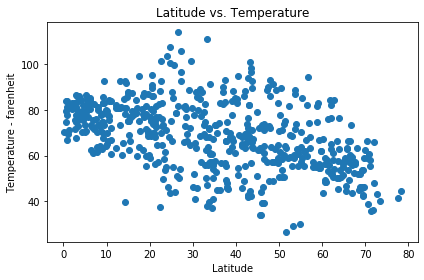

In [45]:
Latitude=weather_df_clean["latitude"]
Temperature=weather_df_clean["temperature_farenheit"]
plt.scatter(Latitude,Temperature)
                              
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature - farenheit")
plt.tight_layout()
plt.show()


## Latitude vs. Humidity Plot

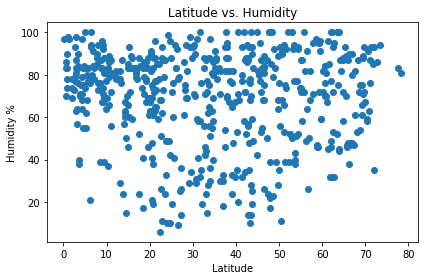

In [46]:
Latitude=weather_df_clean["latitude"]
Temperature=weather_df_clean["humidity_percent"]
plt.scatter(Latitude,Temperature)
                              
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.tight_layout()
plt.show()


## Latitude vs. Cloudiness Plot

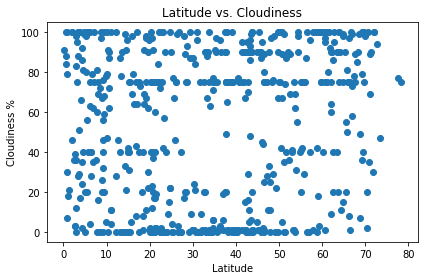

In [47]:
Latitude=weather_df_clean["latitude"]
Temperature=weather_df_clean["cloudiness_percent"]
plt.scatter(Latitude,Temperature)
                              
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.tight_layout()
plt.show()


## Latitude vs. Wind Speed Plot

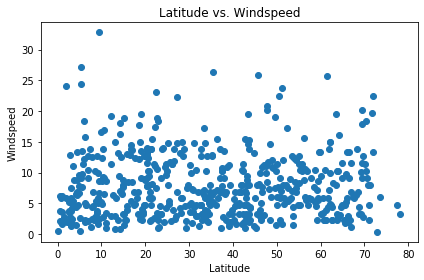

In [48]:
Latitude=weather_df_clean["latitude"]
Temperature=weather_df_clean["windspeed_mph"]
plt.scatter(Latitude,Temperature)
                              
plt.title("Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.tight_layout()
plt.show()


## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [53]:
# Create Northern and Southern Hemisphere DataFrames
weather_df_north=weather_df[weather_df["latitude"] > 0]
weather_df_south=weather_df[weather_df["latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression